In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

import analysis.plotting as pl
import modules.iterable_funcs as itf
import modules.numpy_funcs as nf

In [3]:
%matplotlib inline

### Load variables

In [4]:
load_dir = os.path.join('..', 'data', 'saved_variables')

population = np.load(os.path.join(load_dir, 'population.npy'))
labels = np.load(os.path.join(load_dir, 'labels.npy'))
path_matrix = np.load(os.path.join(load_dir, 'path_matrix.npy'))

In [5]:
part_types = ['Head', 'Hip', 'Thigh', 'Knee', 'Calf', 'Foot']

### Add noisy foot

In [6]:
population = np.vstack([population, [-20, -20, 300]])
labels = np.append(labels, max(labels))
 
path_extra = np.append(path_matrix[-1, :-1], len(labels) - 1)
path_matrix = np.vstack([path_matrix, path_extra])

## Customize font

In [7]:
plt.rc('text', usetex=True)

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)  # pass in the font dict as kwargs

### Plot population

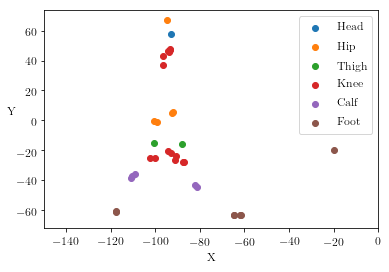

In [8]:
fig = plt.figure()

pl.scatter_labels(population, labels)

plt.legend(part_types)
plt.xlim((-150, 0))
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

In [9]:
# fig.savefig('labelled_points.pdf', format='pdf', dpi=1200)

### Show score matrix filtering

In [10]:
label_adj_list = {0: {1}, 1: {2, 3}, 2: {3}, 3: {4, 5}, 4: {5}}

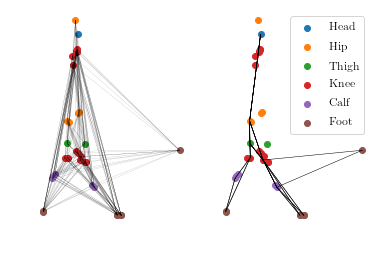

In [11]:
fig = plt.figure()

plt.subplot(1, 2, 1)
pl.scatter_labels(population, labels)
    
# Plot links of unfiltered score matrix
population_groups = list(nf.group_by_label(population, labels))

for u in label_adj_list:
    for v in label_adj_list[u]:
        points_u, points_v = population_groups[u], population_groups[v]
        pl.connect_two_sets(points_u, points_v, c='k', linewidth=0.07)
    
plt.axis('off')
    

plt.subplot(1, 2, 2)
pl.scatter_labels(population, labels)
plt.legend(part_types)

# Plot links of filtered score matrix
for path in path_matrix:
    for u in label_adj_list:
        for v in label_adj_list[u]:
            a, b = path[u], path[v]
            
            point_a, point_b = population[a], population[b]
            pl.connect_points(point_a, point_b, c='k', linewidth=0.5)

plt.axis('off')
plt.show()

In [12]:
fig.savefig('score_matrix.png', format='png')

### Plot spheres

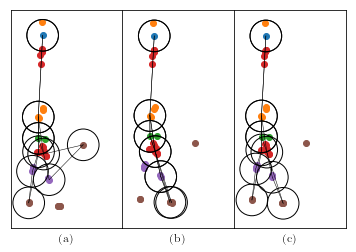

In [13]:
def plot_spheres(path_matrix):
    
    pl.scatter_labels(population, labels)
    
    for path in path_matrix:
        pl.scatter2(population[path, :], s=1e3, facecolors='none', edgecolors='k')
        

def plot_links(label_adj_list, path_matrix):
    
    for path in path_matrix:
        for u in label_adj_list:
            for v in label_adj_list[u]:
                a, b = path[u], path[v]
                point_a, point_b = population[a], population[b]
                pl.connect_points(point_a, point_b, c='k', linewidth=0.5)

                
fig = plt.figure()

ax1 = plt.subplot(1, 3, 1)
path_matrix_1 = path_matrix[[-1, 2], :]
plot_spheres(path_matrix_1)
plot_links(label_adj_list, path_matrix_1)

ax2 = plt.subplot(1, 3, 2)
path_matrix_2 = path_matrix[[1, 3], :]
plot_spheres(path_matrix_2)
plot_links(label_adj_list, path_matrix_2)

ax3 = plt.subplot(1, 3, 3)
path_matrix_3 = path_matrix[[1, 2], :]
plot_spheres(path_matrix_3)
plot_links(label_adj_list, path_matrix_3)

ax1.set_xlabel('(a)')
ax2.set_xlabel('(b)')
ax3.set_xlabel('(c)')

ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

ax1.tick_params(axis='y', which='both', left=False, labelleft=False)
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
ax3.tick_params(axis='y', which='both', left=False, labelleft=False)

ax1.set_xlim([-150, 50])
ax2.set_xlim([-150, 50])
ax3.set_xlim([-150, 50])

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

### Plot body graph

In [14]:
def generate_points(n_points_per_set):
    
    n_sets = len(n_points_per_set)

    for i, n_points in enumerate(n_points_per_set):

        y_vals = (n_sets - i) * np.ones(n_points)
        x_vals = np.linspace(0, 1, n_points + 1, endpoint=False)[1:]
        
        points = np.stack([(x, y) for x, y in zip(x_vals, y_vals)])
        
        yield points

In [15]:
n_points_per_set = [2, 3, 5, 2, 4, 5]

point_sets = [*generate_points(n_points_per_set)]

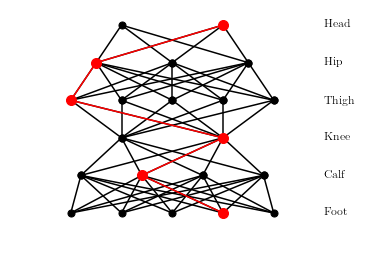

In [16]:
fig = plt.figure()

for points_a, points_b in itf.pairwise(point_sets):
        
    points = np.vstack([points_a, points_b])

    pl.scatter2(points, c='k', s=50)
    pl.connect_two_sets(points_a, points_b, c='k')
    
    
# Highlight path in red
prev_path_point = []
for row_points in point_sets:
    
    path_point = row_points[np.random.randint(row_points.shape[0])]

    pl.scatter2(path_point, c='r', s=100, zorder=3)
    
    if len(prev_path_point) > 0:
        pl.connect_points(prev_path_point, path_point, c='r', zorder=3)
    
    prev_path_point = path_point


# Label rows with body part names  
y_coords = [points[0, 1] for points in point_sets]

for i, part_type in enumerate(part_types):
    
    plt.text(1, y_coords[i]-0.075, part_type, fontsize=12)

plt.xlim((0, 1.1))
plt.axis('off')
plt.show()


In [17]:
# fig.savefig('body_graph.pdf', format='pdf', dpi=1200)